In [1]:
import matplotlib.pyplot as plt
from src.invert_c_theta import Invert
import pandas as pd
import firedrake

2024-10-09 19:29:59.065581: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-09 19:29:59.066024: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-09 19:29:59.068492: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-09 19:29:59.098252: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-09 19:29:59.681666: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
drichlet_ids = [2,3,4]
side_ids = []
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig', reg_constant_simultaneous = 1, read_mesh = False,opts = None, drichlet_ids = drichlet_ids , lcar = 9e3)

Reading outline from icepack database
Creating mesh
Reading mesh
Reading bedmachine data
Initializing function spaces
Initializing 3d function spaces
Initializing fields
Defining friction law
Setting ramp power to :  1
Initializing heat transport


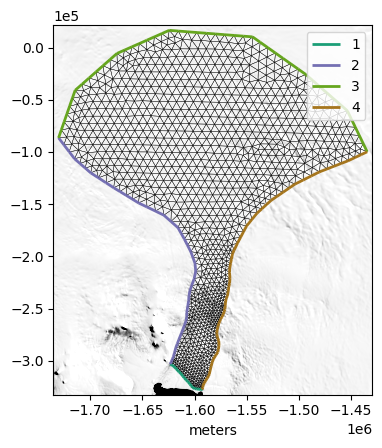

In [3]:
invert_pig.plot_mesh()

In [4]:
invert_pig.import_velocity_data(C = 'driving-stress' ) #C = 'constant', constant_val=0.01)   #C = 'driving-stress' ) #,constant_val=0.01)

Reading velocity from measures database
C0 is computed using driving stress


In [5]:
invert_pig.import_geophysics_data(name_list=['data/geophysics/ADMAP_MagneticAnomaly_5km.tif', 
                                                'data/geophysics/ANTGG_BouguerAnomaly_10km.tif', 
                                                'data/geophysics/GeothermalHeatFlux_5km.tif',
                                                'data/geophysics/ALBMAP_SurfaceAirTemperature_5km.tif',
                                                'data/geophysics/EIGEN-6C4_GravityDisturbance_10km.tif',
                                                'data/geophysics/ALBMAP_SnowAccumulation_Arthern_5km.tif',])

In [6]:
u =  invert_pig.simulation()
firedrake.assemble(invert_pig.loss_functional_nosigma(u))

9489265.370787548

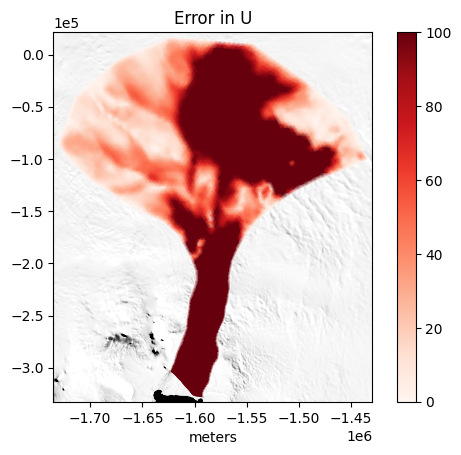

In [7]:
invert_pig.plot_u_error_no_sigma(u, vmax = 100)

In [8]:
invert_pig.default_u = u

In [9]:
invert_pig.iterate_C_temperature(outer_iterations = 2, inverse_iterations = 0)

Using loss function without sigma

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     9.489265e+06   7.336296e+02                  2.388036e+04   
Optimization Terminated with Status: Iteration Limit Exceeded
Number of time steps: 44
....Using loss function without sigma


ConvergenceError: Nonlinear solve failed to converge after 50 nonlinear iterations.
Reason:
   DIVERGED_MAX_IT

In [ ]:
u_optimized =  invert_pig.simulation()

Text(0.5, 1.0, 'A0')

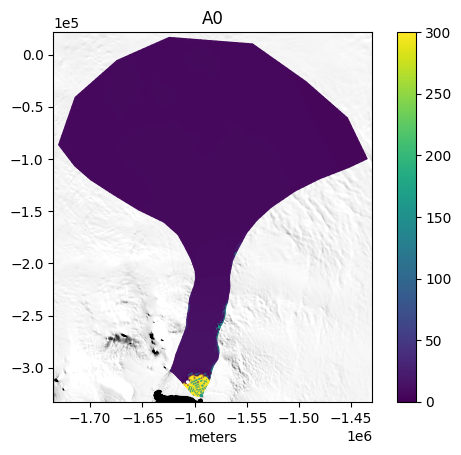

In [11]:

fig, axes = invert_pig.plot_bounded_antarctica()
axes.set_xlabel("meters")
A0 = firedrake.interpolate(invert_pig.A0, invert_pig.Q)
colors = firedrake.tripcolor(A0, vmin = 0, vmax = 300, axes=axes)
fig.colorbar(colors)
plt.title('A0')


In [14]:
firedrake.assemble(invert_pig.loss_functional_nosigma(u_optimized))

NameError: name 'u_optimized' is not defined